# 라이브러리 불러오기

# Null 값 확인
1. format 형식
2. msno 사용

# Target의 분포 경향 확인

# EDA - Pclass : groupby, crosstab, pandas plot(평균생존률)
# EDA - Sex : 성별 별로 생존 수와 생존률, crosstab, factorplot
# EDA - Age : 최연장자, 최연소자, 평균, kdeplot

In [53]:
import numpy as np
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10')
sns.set(font_scale=2.5)
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.describe())
print(df_test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

In [15]:
for col in df_train.columns :
    nan_ratio = 100*(df_train[col].isnull().sum()/len(df_train[col]))
    print('{:<15}중 결측치의 비율은 {:.2f}%'.format(col,nan_ratio))

PassengerId    중 결측치의 비율은 0.00%
Survived       중 결측치의 비율은 0.00%
Pclass         중 결측치의 비율은 0.00%
Name           중 결측치의 비율은 0.00%
Sex            중 결측치의 비율은 0.00%
Age            중 결측치의 비율은 19.87%
SibSp          중 결측치의 비율은 0.00%
Parch          중 결측치의 비율은 0.00%
Ticket         중 결측치의 비율은 0.00%
Fare           중 결측치의 비율은 0.00%
Cabin          중 결측치의 비율은 77.10%
Embarked       중 결측치의 비율은 0.22%


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


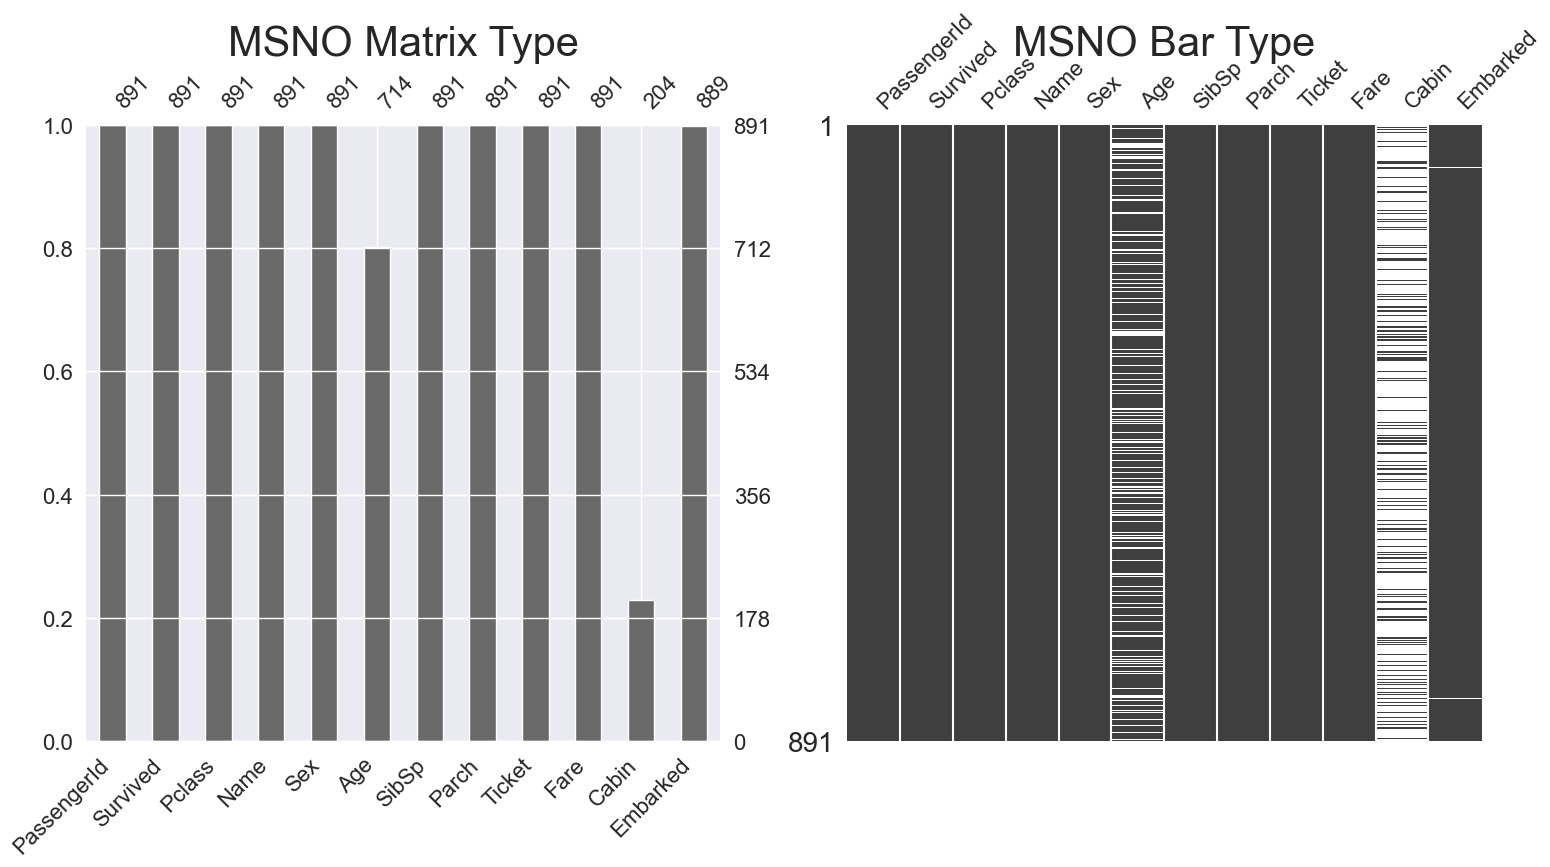

In [54]:
y_position = 1.1
f,ax = plt.subplots(1,2,figsize=(18,8))
msno.bar(df=df_train, ax=ax[0])
msno.matrix(df=df_train, ax=ax[1])
ax[0].set_title('MSNO Matrix Type',y=y_position)
ax[1].set_title('MSNO Bar Type',y=y_position)
plt.show()

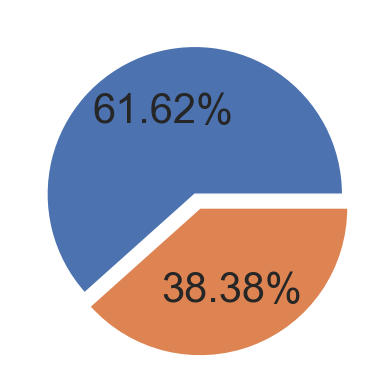

In [55]:
plt.pie(df_train['Survived'].value_counts(), autopct='%.2f%%',explode=[0,0.1])
plt.show()

In [56]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


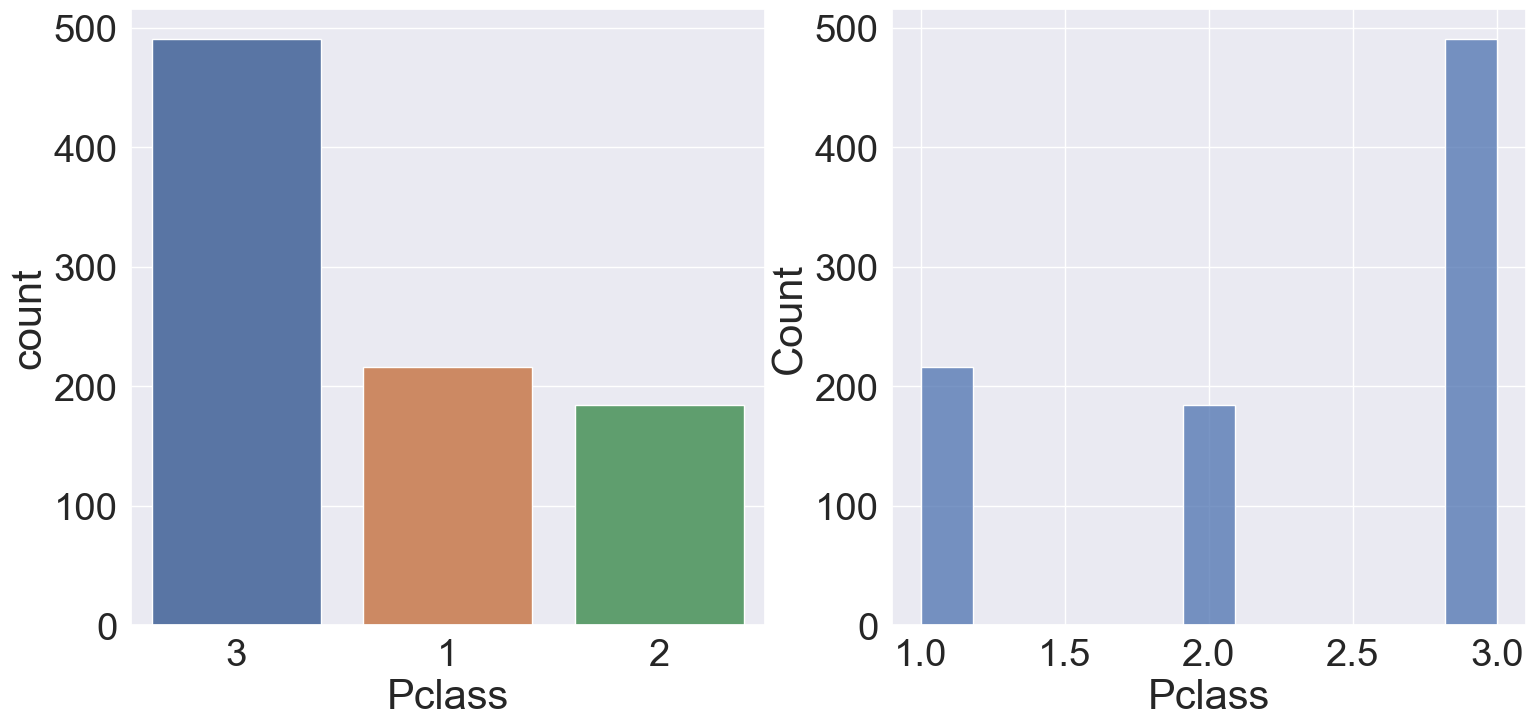

In [112]:
# 각 Pclass 전체 인원 수, 생존자 수, 생존률
# 각 Pclass에서 생존/사망 비율
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.countplot(data=df_train,x='Pclass', ax=ax[0], order=df_train['Pclass'].value_counts().index)
sns.histplot(data=df_train,x='Pclass', ax=ax[1])

plt.show()

In [64]:
df_train[['Pclass','Survived']].groupby(by='Pclass',as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [69]:
pd.crosstab(df_train['Survived'],df_train['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


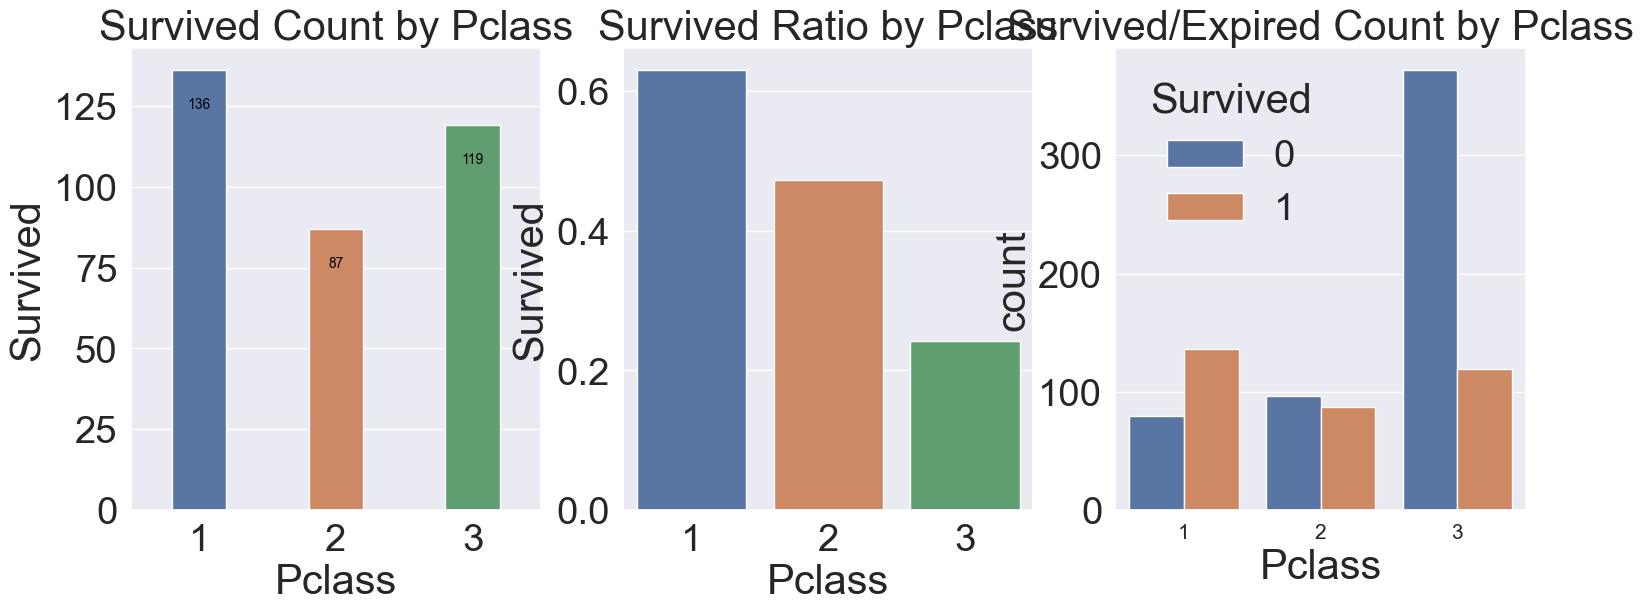

In [118]:
# Pclass별 생존률 그래프 그리기
f,ax = plt.subplots(1,3,figsize=(18,6))

##### PLOT - 1
sns.barplot(data=df_train[['Survived','Pclass']],x='Pclass',y='Survived',ax=ax[0], estimator=np.sum, ci=None,dodge=False)
for p in ax[0].patches: 
    ##### annot
    ax[0].annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 15), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
    
    ##### bar width
    x = p.get_x()
    old_width = p.get_width()
    p.set_width(0.4)
    p.set_x(x+(old_width-0.4)/2)

##### PLOT - 2
sns.barplot(data=df_train[['Survived','Pclass']],x='Pclass',y='Survived',ax=ax[1], estimator=np.mean, ci=None,dodge=False)

##### PLOT - 3
sns.countplot(data=df_train[['Survived','Pclass']],x='Pclass',hue='Survived',ax=ax[2])

ax[0].set_title('Survived Count by Pclass')
ax[1].set_title('Survived Ratio by Pclass')
ax[2].set_title('Survived/Expired Count by Pclass')
plt.xticks(fontsize=15, rotation=0)

plt.show()

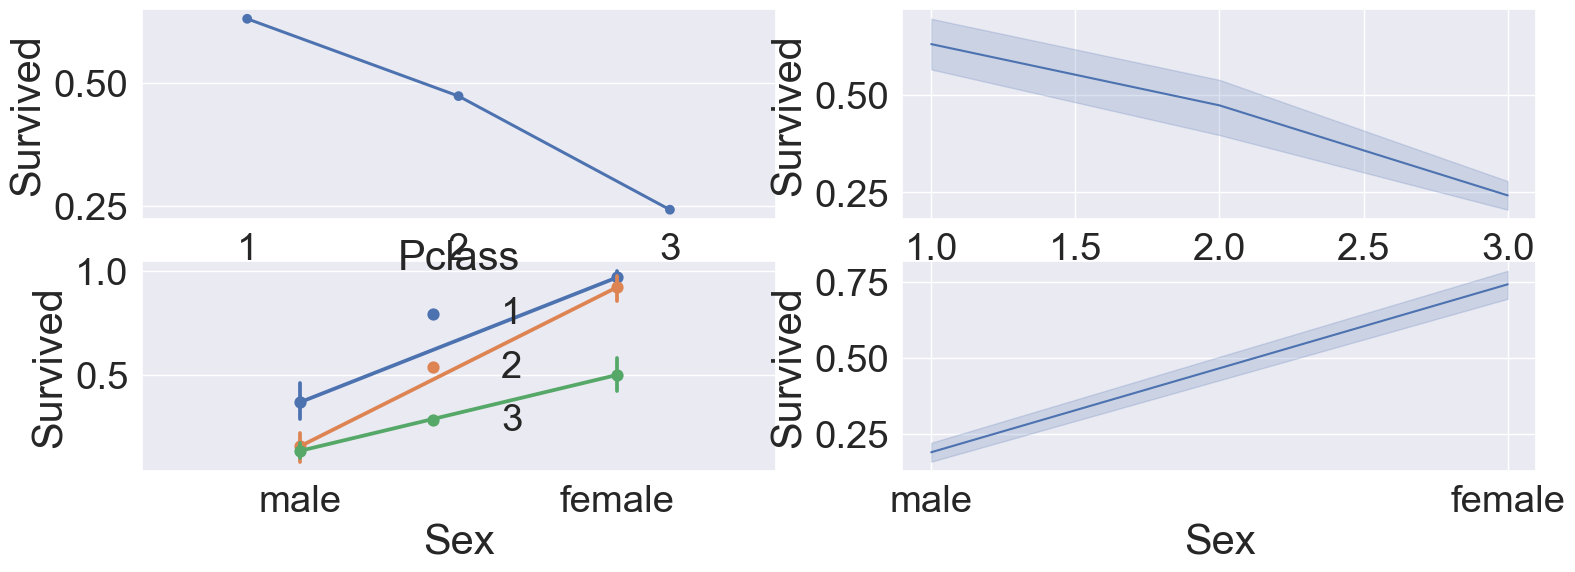

In [147]:
f,ax = plt.subplots(2,2,figsize=(18,6))

sns.pointplot(data=df_train, x='Pclass', y='Survived', estimator=np.mean, ci=None, scale=0.8, ax=ax[0,0], hue='Sex')
sns.lineplot(data=df_train, x='Pclass', y='Survived', estimator=np.mean, ax=ax[0,1])

sns.pointplot(data=df_train, x='Sex', y='Survived', estimator=np.mean, ax=ax[1,0], hue='Pclass')
sns.lineplot(data=df_train, x='Sex', y='Survived', estimator=np.mean, ax=ax[1,1])

plt.show()

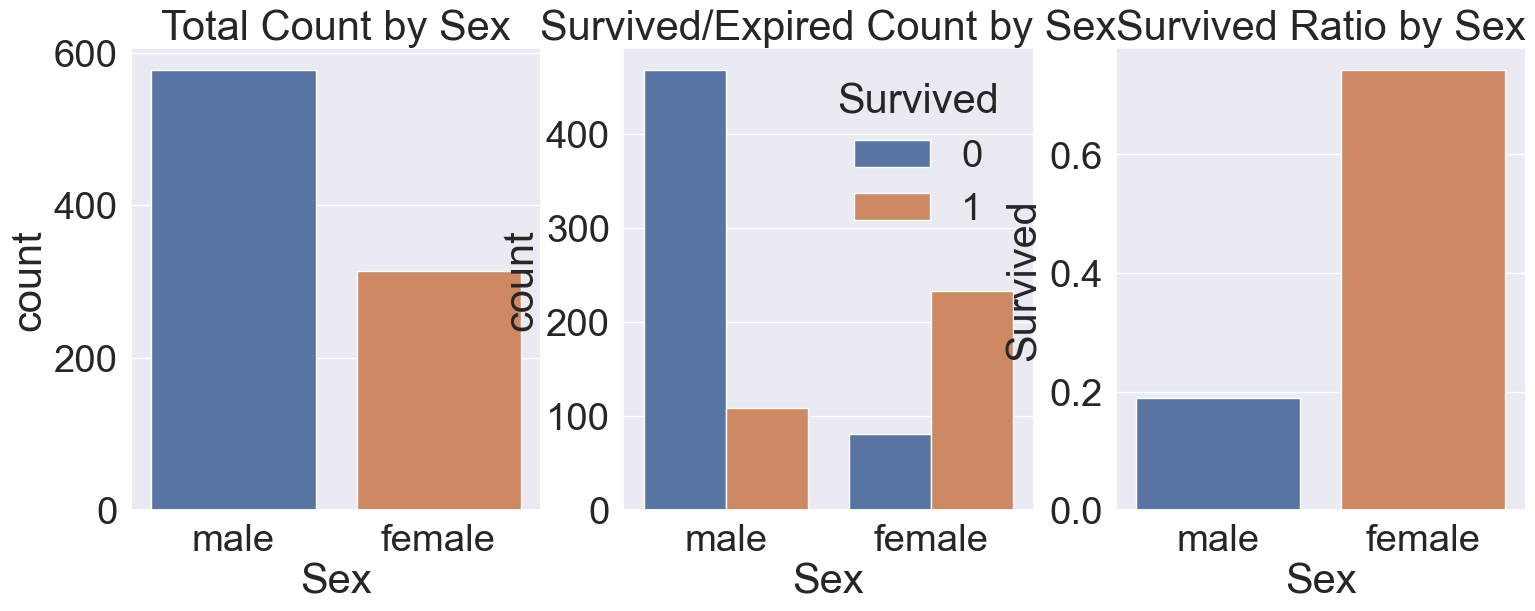

In [126]:
# Sex를 기준으로 총 인원 수, 생존률, 생존/사망 count 수 비교

f,ax = plt.subplots(1,3,figsize=(18,6))

sns.countplot(data=df_train, x='Sex',ax=ax[0])
sns.countplot(data=df_train, x='Sex',ax=ax[1],hue='Survived')
sns.barplot(data=df_train, x='Sex',y='Survived',estimator=np.mean, ci=None, ax=ax[2])

ax[0].set_title('Total Count by Sex')
ax[1].set_title('Survived/Expired Count by Sex')
ax[2].set_title('Survived Ratio by Sex')

plt.show()

ValueError: Unrecognized character e in format string

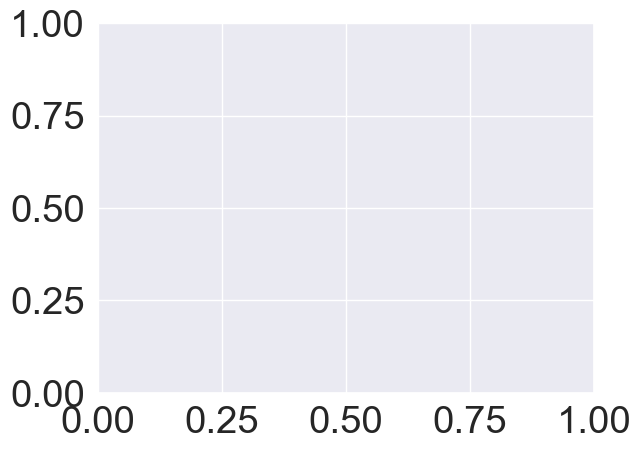

In [151]:
# Age를 histplot, kdeplot으로 나타내기

df_train['Age'].plot(style='kde')